Name : Sagar Mahale

Project : United States Airlines Analysis

DESCRIPTION :

According to air travel consumer reports, a large proportion of consumer complaints are about frequent flight delays.

Out of all the complaints received from consumers about airline services, 32% were related to cancellations, delays, or other deviations from the airlines’ schedules.

There are unavoidable delays that can be caused by air traffic, no passengers at the airport, weather conditions, mechanical issues, passengers coming from delayed connecting flights, security clearance, and aircraft preparation.

Objective:

The objective of this project is to identify the factors that contribute to avoidable flight delays. You are also required to build a model to predict if the flight will be delayed.

# Applied data science with Python (Task 1)

1. Import and aggregate data:
a. Collect information related to flights, airports (e.g., type of airport and elevation), and runways 
(e.g., length_ft, width_ft, surface, and number of runways). Gather all fields you believe might cause 
avoidable delays in one dataset.

Hint: In this case, you would have to determine the keys to join the tables. A data description will be 
useful

In [1]:
#Import the appropriate libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the appropriate datasets
airlines=pd.read_excel("Airlines.xlsx")

In [3]:
airports=pd.read_excel("airports.xlsx")

In [4]:
runways=pd.read_excel("runways.xlsx")

In [5]:
airlines.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [6]:
airports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NaN,US,US-AR,Newport,no,NaN,NaN,NaN,NaN,NaN,00AR


In [7]:
runways.head()

,id,airport_ref,airport_ident,length_ft,width_ft,surface,lighted,closed,le_ident,le_latitude_deg,le_longitude_deg,le_elevation_ft,le_heading_degT,le_displaced_threshold_ft,he_ident,he_latitude_deg,he_longitude_deg,he_elevation_ft,he_heading_degT,he_displaced_threshold_ft
0,269408,6523,00A,80.0,80.0,ASPH-G,1,0,H1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,255155,6524,00AK,2500.0,70.0,GRVL,0,0,N,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN
2,254165,6525,00AL,2300.0,200.0,TURF,0,0,1,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN
3,270932,6526,00AR,40.0,40.0,GRASS,0,0,H1,NaN,NaN,NaN,NaN,NaN,H1,NaN,NaN,NaN,NaN,NaN
4,322128,322127,00AS,1450.0,60.0,Turf,0,0,1,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN


In [8]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518556 entries, 0 to 518555
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           518556 non-null  int64 
 1   Airline      518556 non-null  object
 2   Flight       518556 non-null  int64 
 3   AirportFrom  518556 non-null  object
 4   AirportTo    518556 non-null  object
 5   DayOfWeek    518556 non-null  int64 
 6   Time         518556 non-null  int64 
 7   Length       518556 non-null  int64 
 8   Delay        518556 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 35.6+ MB


In [9]:
airlines.isnull().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

In [10]:
airlines.shape

(518556, 9)

In [11]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73805 entries, 0 to 73804
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 73805 non-null  int64  
 1   ident              73805 non-null  object 
 2   type               73805 non-null  object 
 3   name               73805 non-null  object 
 4   latitude_deg       73805 non-null  float64
 5   longitude_deg      73805 non-null  float64
 6   elevation_ft       59683 non-null  float64
 7   continent          38086 non-null  object 
 8   iso_country        73546 non-null  object 
 9   iso_region         73805 non-null  object 
 10  municipality       68739 non-null  object 
 11  scheduled_service  73805 non-null  object 
 12  gps_code           42996 non-null  object 
 13  iata_code          9160 non-null   object 
 14  local_code         32975 non-null  object 
 15  home_link          3492 non-null   object 
 16  wikipedia_link     107

In [12]:
airports.isnull().sum()

id                       0
ident                    0
type                     0
name                     0
latitude_deg             0
longitude_deg            0
elevation_ft         14122
continent            35719
iso_country            259
iso_region               0
municipality          5066
scheduled_service        0
gps_code             30809
iata_code            64645
local_code           40830
home_link            70313
wikipedia_link       63100
keywords             59854
dtype: int64

In [13]:
airports.shape

(73805, 18)

In [14]:
runways.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43977 entries, 0 to 43976
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         43977 non-null  int64  
 1   airport_ref                43977 non-null  int64  
 2   airport_ident              43977 non-null  object 
 3   length_ft                  43753 non-null  float64
 4   width_ft                   41088 non-null  float64
 5   surface                    43520 non-null  object 
 6   lighted                    43977 non-null  int64  
 7   closed                     43977 non-null  int64  
 8   le_ident                   43793 non-null  object 
 9   le_latitude_deg            15016 non-null  float64
 10  le_longitude_deg           15000 non-null  float64
 11  le_elevation_ft            12781 non-null  float64
 12  le_heading_degT            14624 non-null  float64
 13  le_displaced_threshold_ft  2883 non-null   flo

In [15]:
runways.isnull().sum()

id                               0
airport_ref                      0
airport_ident                    0
length_ft                      224
width_ft                      2889
surface                        457
lighted                          0
closed                           0
le_ident                       184
le_latitude_deg              28961
le_longitude_deg             28977
le_elevation_ft              31196
le_heading_degT              29353
le_displaced_threshold_ft    41094
he_ident                      6645
he_latitude_deg              29006
he_longitude_deg             29004
he_elevation_ft              31357
he_heading_degT              27549
he_displaced_threshold_ft    40801
dtype: int64

In [16]:
runways.shape

(43977, 20)

In [17]:
num_runways = runways.groupby('airport_ident')['id'].nunique()

# Create a new DataFrame to store the number of runways
runway_counts = pd.DataFrame({'airport_ident': num_runways.index, 'No of Runways': num_runways.values})

# Merge the 'runway_counts' DataFrame with the 'runways' DataFrame based on 'airport_ident'
runways = runways.merge(runway_counts, on='airport_ident', how='left')

In [18]:
runways.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43977 entries, 0 to 43976
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         43977 non-null  int64  
 1   airport_ref                43977 non-null  int64  
 2   airport_ident              43977 non-null  object 
 3   length_ft                  43753 non-null  float64
 4   width_ft                   41088 non-null  float64
 5   surface                    43520 non-null  object 
 6   lighted                    43977 non-null  int64  
 7   closed                     43977 non-null  int64  
 8   le_ident                   43793 non-null  object 
 9   le_latitude_deg            15016 non-null  float64
 10  le_longitude_deg           15000 non-null  float64
 11  le_elevation_ft            12781 non-null  float64
 12  le_heading_degT            14624 non-null  float64
 13  le_displaced_threshold_ft  2883 non-null   flo

In [19]:
#Descriptive Statistics of a datasets(It will include the only numerical features and discards the Object features)
airlines.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,518556.000000,518556.000000,518556.000000,518556.000000,518556.000000,518556.000000
mean,269563.584330,2499.380728,3.927088,801.506969,132.219201,0.451232
std,155686.677958,2075.181658,1.914558,277.634360,70.926564,0.497616
min,1.000000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134696.750000,756.000000,2.000000,565.000000,80.000000,0.000000
50%,269465.500000,1915.000000,4.000000,795.000000,115.000000,0.000000
75%,404318.250000,3839.000000,5.000000,1030.000000,163.000000,1.000000
max,539383.000000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [20]:
airports.describe()

,id,latitude_deg,longitude_deg,elevation_ft
count,73805.000000,73805.000000,73805.000000,59683.000000
mean,150714.755572,25.786389,-28.880235,1299.934370
std,155134.635662,26.232686,86.121515,1672.759483
min,2.000000,-90.000000,-179.876999,-1266.000000
25%,18593.000000,12.536100,-94.170097,205.000000
50%,39585.000000,35.160179,-69.893898,730.000000
75%,332266.000000,42.720901,23.934668,1608.000000
max,504544.000000,82.750000,179.975700,17372.000000


In [21]:
runways.describe()

,id,airport_ref,length_ft,width_ft,lighted,closed,le_latitude_deg,le_longitude_deg,le_elevation_ft,le_heading_degT,le_displaced_threshold_ft,he_latitude_deg,he_longitude_deg,he_elevation_ft,he_heading_degT,he_displaced_threshold_ft,No of Runways
count,43977.000000,43977.000000,43753.000000,41088.000000,43977.000000,43977.000000,15016.000000,15000.000000,12781.000000,14624.000000,2883.000000,14971.000000,14973.000000,12620.000000,16428.000000,3176.000000,43977.000000
mean,262432.747823,47566.936853,3248.773570,109.191735,0.256771,0.016645,31.130250,-39.997233,1057.835694,104.343697,534.733958,31.120983,-39.888205,1052.419414,261.891053,533.394836,1.404348
std,30153.409893,91960.607079,2699.390401,227.428278,0.436857,0.127939,23.088749,79.760396,1454.296792,57.435357,473.318527,23.091114,79.727651,1447.139352,78.255328,463.240091,0.831571
min,232758.000000,2.000000,0.000000,0.000000,0.000000,0.000000,-75.597198,-178.302994,-1246.000000,0.000000,1.000000,-75.595398,-178.292007,-1210.000000,0.000000,9.000000,1.000000
25%,243772.000000,9058.000000,1640.000000,59.000000,0.000000,0.000000,28.812327,-96.477581,120.000000,57.000000,225.500000,28.780499,-96.423103,119.000000,226.000000,226.000000,1.000000
50%,254774.000000,19486.000000,2700.000000,75.000000,0.000000,0.000000,37.559450,-80.225750,578.000000,98.000000,400.000000,37.547600,-80.164902,574.000000,270.000000,400.000000,1.000000
75%,265788.000000,29702.000000,4200.000000,100.000000,1.000000,0.000000,44.276277,15.339312,1248.000000,148.000000,685.000000,44.285349,15.516300,1240.000000,316.000000,692.000000,2.000000
max,504524.000000,430661.000000,30000.000000,9000.000000,1.000000,1.000000,82.512802,179.337006,13202.000000,360.000000,6365.000000,82.522797,179.343002,13314.000000,363.000000,5001.000000,11.000000


In [22]:
runways.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43977 entries, 0 to 43976
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         43977 non-null  int64  
 1   airport_ref                43977 non-null  int64  
 2   airport_ident              43977 non-null  object 
 3   length_ft                  43753 non-null  float64
 4   width_ft                   41088 non-null  float64
 5   surface                    43520 non-null  object 
 6   lighted                    43977 non-null  int64  
 7   closed                     43977 non-null  int64  
 8   le_ident                   43793 non-null  object 
 9   le_latitude_deg            15016 non-null  float64
 10  le_longitude_deg           15000 non-null  float64
 11  le_elevation_ft            12781 non-null  float64
 12  le_heading_degT            14624 non-null  float64
 13  le_displaced_threshold_ft  2883 non-null   flo

In [23]:
#merge data using airport codes

# Select the important columns from the airports dataframe
airports = airports[['ident', 'type', 'name', 'latitude_deg', 'longitude_deg', 'iso_country','elevation_ft']]

# Select the important columns from the runways dataframe
runways = runways[['airport_ident', 'length_ft', 'width_ft' , 'surface' , 'le_ident' , 'le_latitude_deg' , 'le_longitude_deg' , 'le_elevation_ft' , 'he_ident' , 'he_latitude_deg' , 'he_longitude_deg' , 'he_elevation_ft','No of Runways']]

# Merge the airports and runways dataframes based on the airport code
merged_df = pd.merge(airports, runways, left_on='ident', right_on='airport_ident', how='inner')

In [24]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43977 entries, 0 to 43976
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ident             43977 non-null  object 
 1   type              43977 non-null  object 
 2   name              43977 non-null  object 
 3   latitude_deg      43977 non-null  float64
 4   longitude_deg     43977 non-null  float64
 5   iso_country       43940 non-null  object 
 6   elevation_ft      42472 non-null  float64
 7   airport_ident     43977 non-null  object 
 8   length_ft         43753 non-null  float64
 9   width_ft          41088 non-null  float64
 10  surface           43520 non-null  object 
 11  le_ident          43793 non-null  object 
 12  le_latitude_deg   15016 non-null  float64
 13  le_longitude_deg  15000 non-null  float64
 14  le_elevation_ft   12781 non-null  float64
 15  he_ident          37332 non-null  object 
 16  he_latitude_deg   14971 non-null  float6

In [25]:
# select important columns from merged_df
merged_df = merged_df[['ident','type', 'name', 'latitude_deg', 'longitude_deg', 'iso_country', 'length_ft', 'width_ft', 'surface','elevation_ft','No of Runways']]

In [26]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43977 entries, 0 to 43976
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ident          43977 non-null  object 
 1   type           43977 non-null  object 
 2   name           43977 non-null  object 
 3   latitude_deg   43977 non-null  float64
 4   longitude_deg  43977 non-null  float64
 5   iso_country    43940 non-null  object 
 6   length_ft      43753 non-null  float64
 7   width_ft       41088 non-null  float64
 8   surface        43520 non-null  object 
 9   elevation_ft   42472 non-null  float64
 10  No of Runways  43977 non-null  int64  
dtypes: float64(5), int64(1), object(5)
memory usage: 4.0+ MB


In [27]:
 merged_df.head()

,ident,type,name,latitude_deg,longitude_deg,iso_country,length_ft,width_ft,surface,elevation_ft,No of Runways
0,00A,heliport,Total Rf Heliport,40.070801,-74.933601,US,80.0,80.0,ASPH-G,11.0,1
1,00AK,small_airport,Lowell Field,59.947733,-151.692524,US,2500.0,70.0,GRVL,450.0,1
2,00AL,small_airport,Epps Airpark,34.864799,-86.770302,US,2300.0,200.0,TURF,820.0,1
3,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,US,40.0,40.0,GRASS,237.0,1
4,00AS,small_airport,Fulton Airport,34.942803,-97.818019,US,1450.0,60.0,Turf,1100.0,1


In [28]:
#Adding a new column called ID
merged_df['ID'] = range(1, len(merged_df)+1)

In [29]:
merged_df.head()

,ident,type,name,latitude_deg,longitude_deg,iso_country,length_ft,width_ft,surface,elevation_ft,No of Runways,ID
0,00A,heliport,Total Rf Heliport,40.070801,-74.933601,US,80.0,80.0,ASPH-G,11.0,1,1
1,00AK,small_airport,Lowell Field,59.947733,-151.692524,US,2500.0,70.0,GRVL,450.0,1,2
2,00AL,small_airport,Epps Airpark,34.864799,-86.770302,US,2300.0,200.0,TURF,820.0,1,3
3,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,US,40.0,40.0,GRASS,237.0,1,4
4,00AS,small_airport,Fulton Airport,34.942803,-97.818019,US,1450.0,60.0,Turf,1100.0,1,5


In [30]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43977 entries, 0 to 43976
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ident          43977 non-null  object 
 1   type           43977 non-null  object 
 2   name           43977 non-null  object 
 3   latitude_deg   43977 non-null  float64
 4   longitude_deg  43977 non-null  float64
 5   iso_country    43940 non-null  object 
 6   length_ft      43753 non-null  float64
 7   width_ft       41088 non-null  float64
 8   surface        43520 non-null  object 
 9   elevation_ft   42472 non-null  float64
 10  No of Runways  43977 non-null  int64  
 11  ID             43977 non-null  int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 4.4+ MB


In [31]:
merged_df = merged_df.rename(columns={'ID': 'id'})

In [32]:
airline_df = merged_df.merge(airlines, on='id', how='inner')

In [33]:
airline_df.head()

,ident,type,name,latitude_deg,longitude_deg,iso_country,length_ft,width_ft,surface,elevation_ft,No of Runways,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,00A,heliport,Total Rf Heliport,40.070801,-74.933601,US,80.0,80.0,ASPH-G,11.0,1,1,CO,269,SFO,IAH,3,15,205,1
1,00AK,small_airport,Lowell Field,59.947733,-151.692524,US,2500.0,70.0,GRVL,450.0,1,2,US,1558,PHX,CLT,3,15,222,1
2,00AL,small_airport,Epps Airpark,34.864799,-86.770302,US,2300.0,200.0,TURF,820.0,1,3,AA,2400,LAX,DFW,3,20,165,1
3,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,US,40.0,40.0,GRASS,237.0,1,4,AA,2466,SFO,DFW,3,20,195,1
4,00AS,small_airport,Fulton Airport,34.942803,-97.818019,US,1450.0,60.0,Turf,1100.0,1,5,AS,108,ANC,SEA,3,30,202,0


In [34]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42387 entries, 0 to 42386
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ident          42387 non-null  object 
 1   type           42387 non-null  object 
 2   name           42387 non-null  object 
 3   latitude_deg   42387 non-null  float64
 4   longitude_deg  42387 non-null  float64
 5   iso_country    42368 non-null  object 
 6   length_ft      42169 non-null  float64
 7   width_ft       39593 non-null  float64
 8   surface        41947 non-null  object 
 9   elevation_ft   40925 non-null  float64
 10  No of Runways  42387 non-null  int64  
 11  id             42387 non-null  int64  
 12  Airline        42387 non-null  object 
 13  Flight         42387 non-null  int64  
 14  AirportFrom    42387 non-null  object 
 15  AirportTo      42387 non-null  object 
 16  DayOfWeek      42387 non-null  int64  
 17  Time           42387 non-null  int64  
 18  Length

In [35]:
#Download the airline_df into the excel format
airline_df.to_excel('airline_data.xlsx', index=False)

In [36]:
airline_df.shape

(42387, 20)

In [37]:
airline_df.isnull().sum()

ident               0
type                0
name                0
latitude_deg        0
longitude_deg       0
iso_country        19
length_ft         218
width_ft         2794
surface           440
elevation_ft     1462
No of Runways       0
id                  0
Airline             0
Flight              0
AirportFrom         0
AirportTo           0
DayOfWeek           0
Time                0
Length              0
Delay               0
dtype: int64

In [38]:
# Calculate the mean elevation value from the available data
mean_elevation = airline_df['elevation_ft'].mean()

# Replace missing values with the mean value
airline_df['elevation_ft'].fillna(mean_elevation, inplace=True)


In [39]:
#PErforming the imputation technique to fill the missing values
airline_df['length_ft'].fillna(airline_df['length_ft'].mean(), inplace=True)
airline_df['width_ft'].fillna(airline_df['width_ft'].median(), inplace=True)
airline_df['surface'].fillna(airline_df['surface'].mode()[0], inplace=True)

In [40]:
airline_df['iso_country'].fillna(airline_df['iso_country'].mode()[0], inplace=True)

In [41]:
airline_df.isnull().sum()

ident            0
type             0
name             0
latitude_deg     0
longitude_deg    0
iso_country      0
length_ft        0
width_ft         0
surface          0
elevation_ft     0
No of Runways    0
id               0
Airline          0
Flight           0
AirportFrom      0
AirportTo        0
DayOfWeek        0
Time             0
Length           0
Delay            0
dtype: int64

In [42]:
airline_df_copy1 = airline_df.copy()

In [43]:
airline_df_copy1.head()

,ident,type,name,latitude_deg,longitude_deg,iso_country,length_ft,width_ft,surface,elevation_ft,No of Runways,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,00A,heliport,Total Rf Heliport,40.070801,-74.933601,US,80.0,80.0,ASPH-G,11.0,1,1,CO,269,SFO,IAH,3,15,205,1
1,00AK,small_airport,Lowell Field,59.947733,-151.692524,US,2500.0,70.0,GRVL,450.0,1,2,US,1558,PHX,CLT,3,15,222,1
2,00AL,small_airport,Epps Airpark,34.864799,-86.770302,US,2300.0,200.0,TURF,820.0,1,3,AA,2400,LAX,DFW,3,20,165,1
3,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,US,40.0,40.0,GRASS,237.0,1,4,AA,2466,SFO,DFW,3,20,195,1
4,00AS,small_airport,Fulton Airport,34.942803,-97.818019,US,1450.0,60.0,Turf,1100.0,1,5,AS,108,ANC,SEA,3,30,202,0


In [44]:
airline_df_copy1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42387 entries, 0 to 42386
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ident          42387 non-null  object 
 1   type           42387 non-null  object 
 2   name           42387 non-null  object 
 3   latitude_deg   42387 non-null  float64
 4   longitude_deg  42387 non-null  float64
 5   iso_country    42387 non-null  object 
 6   length_ft      42387 non-null  float64
 7   width_ft       42387 non-null  float64
 8   surface        42387 non-null  object 
 9   elevation_ft   42387 non-null  float64
 10  No of Runways  42387 non-null  int64  
 11  id             42387 non-null  int64  
 12  Airline        42387 non-null  object 
 13  Flight         42387 non-null  int64  
 14  AirportFrom    42387 non-null  object 
 15  AirportTo      42387 non-null  object 
 16  DayOfWeek      42387 non-null  int64  
 17  Time           42387 non-null  int64  
 18  Length

In [45]:
airline_df_copy1['id'] = range(1, 1 + len(airline_df_copy1))

In [46]:
airline_df_copy1 = airline_df_copy1.drop(airline_df_copy1.index[14:])

In [47]:
airline_df_copy1.shape

(14, 20)

b. When it comes to on-time arrivals, different airlines perform differently based on the amount of 
experience they have. The major airlines in this field include US Airways Express (founded in 
1967) Continental Airlines (founded in 1934), and Express Jet (founded in 19860. Pull such 
information specific to various airlines from the Wikipedia page link given below.
https://en.wikipedia.org/wiki/List_of_airlines_of_the_United_States.

In [48]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Specify the URL of the page to scrape
url = 'https://en.wikipedia.org/wiki/List_of_airlines_of_the_United_States#Passenger_airlines'

# Send a GET request to the specified URL
response = requests.get(url)

# Parse the HTML content of the page using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table containing the airline data
table = soup.find('table', {'class': 'wikitable sortable'})

# Initialize an empty list to store the airline data
airlines_data = []

# Loop through each row in the table
for row in table.find_all('tr'):
    # Find all the columns in the current row
    cols = row.find_all('td')
    
    # If there are more than 7 columns, then this is a valid airline row
    if len(cols) > 7:
        # Extract the data from the columns
        airline_name = cols[0].get_text().strip()
        iata_code = cols[1].get_text().strip()
        icao_code = cols[2].get_text().strip()
        callsign = cols[3].get_text().strip()
        primary_hubs = cols[4].get_text().strip()
        secondary_hubs = cols[5].get_text().strip()
        founded_year = cols[6].get_text().strip()

        # Combine primary and secondary hubs into a single column
        hubs = f"{primary_hubs}, {secondary_hubs}"

        # Append the airline data as a dictionary to the list
        airlines_data.append({
            'Airline Name': airline_name,
            'IATA Code': iata_code,
            'ICAO Code': icao_code,
            'Callsign': callsign,
            'Hubs': hubs,
            'Founded Year': founded_year,
        })

# Convert the list of dictionaries into a pandas DataFrame
Airlines = pd.DataFrame(airlines_data)

# Save the DataFrame as a CSV file
Airlines.to_csv('airlines.csv', index=False)


c. You should then get all the information gathered so far in one place.

In [49]:
Airlines

,Airline Name,IATA Code,ICAO Code,Callsign,Hubs,Founded Year
0,Alaska Airlines,,AS,ASA,"ALASKA, Seattle/TacomaAnchoragePortland (OR)Sa...",1932
1,Allegiant Air,,G4,AAY,"ALLEGIANT, Las VegasCincinnatiFort Walton Beac...",1997
2,American Airlines,,AA,AAL,"AMERICAN, Dallas/Fort WorthCharlotteChicago-O'...",1926
3,Avelo Airlines,,XP,VXP,"AVELO, BurbankNew HavenOrlandoRaleighWilmingto...",1987
4,Breeze Airways,,MX,MXY,"MOXY, CharlestonHartfordNew OrleansNorfolkProv...",2018
5,Delta Air Lines,,DL,DAL,"DELTA, AtlantaBostonDetroitLos AngelesMinneapo...",1924
6,Eastern Airlines,,2D,EAL,"EASTERN, MiamiNew York-JFK",2010
7,Frontier Airlines,,F9,FFT,"FRONTIER FLIGHT, DenverAtlantaChicago-O'HareCi...",1994
8,Hawaiian Airlines,,HA,HAL,"HAWAIIAN, HonoluluKahului",1929
9,JetBlue,,B6,JBU,"JETBLUE, New York-JFKBostonLos AngelesFort Lau...",1998


In [50]:
#Converting the airlines dictionary into a DataFrame and then save it as a CSV file.
Airlines.to_csv('airlines.csv', index=False)

In [51]:
df=pd.read_csv("airlines.csv")

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Airline Name  14 non-null     object 
 1   IATA Code     0 non-null      float64
 2   ICAO Code     14 non-null     object 
 3   Callsign      14 non-null     object 
 4   Hubs          14 non-null     object 
 5   Founded Year  14 non-null     int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 800.0+ bytes


In [53]:
# Dropping multiple columns from the DataFrame
columns_to_drop = ['IATA Code', 'ICAO Code', 'Callsign']
df = df.drop(columns=columns_to_drop)

In [54]:
df.head()

,Airline Name,Hubs,Founded Year
0,Alaska Airlines,"ALASKA, Seattle/TacomaAnchoragePortland (OR)Sa...",1932
1,Allegiant Air,"ALLEGIANT, Las VegasCincinnatiFort Walton Beac...",1997
2,American Airlines,"AMERICAN, Dallas/Fort WorthCharlotteChicago-O'...",1926
3,Avelo Airlines,"AVELO, BurbankNew HavenOrlandoRaleighWilmingto...",1987
4,Breeze Airways,"MOXY, CharlestonHartfordNew OrleansNorfolkProv...",2018


In [55]:
# Dropping multiple columns from the DataFrame
columns_to_drop = ['Hubs']
df = df.drop(columns=columns_to_drop)

In [56]:
df['id'] = range(1, len(df) + 1)

In [57]:
df.head()

,Airline Name,Founded Year,id
0,Alaska Airlines,1932,1
1,Allegiant Air,1997,2
2,American Airlines,1926,3
3,Avelo Airlines,1987,4
4,Breeze Airways,2018,5


d. The total passenger traffic may also contribute to flight delays. The term hub refers to 
busy commercial airports. Large hubs are airports that account for at least 1 percent 
of the total passenger enplanements in the United States. Airports that account for 
0.25 percent to 1 percent of total passenger enplanements are considered medium 
hubs. Pull passenger traffic data from the Wikipedia page given below using web 
scraping and collate it in a table.
https://en.wikipedia.org/wiki/List_of_the_busiest_airports_in_the_United_States

In [58]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Specify the URL of the page to scrape
url = 'https://en.wikipedia.org/wiki/List_of_the_busiest_airports_in_the_United_States#Large_hubs'

# Send a GET request to the specified URL
response = requests.get(url)

# Parse the HTML content of the page using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table containing the airline data
table = soup.find('table', {'class': 'wikitable sortable'})

# Initialize an empty list to store the airline data
airlines_data = []

# Loop through each row in the table
for row in table.find_all('tr'):
    # Find all the columns in the current row
    cols = row.find_all('td')
    
    # If there are more than 7 columns, then this is a valid airline row
    if len(cols) > 7:
        # Extract the data from the columns
        airports_large_hubs = cols[1].get_text().strip()
        year_2021 = cols[5].get_text().strip()
        
     
        # Append the airline data as a dictionary to the list
        airlines_data.append({
            'Airports (large hubs)': airports_large_hubs,
            '2021': year_2021,
        })

# Convert the list of dictionaries into a pandas DataFrame
airlines1_df = pd.DataFrame(airlines_data)

# Save the DataFrame as a CSV file
airlines1_df.to_csv('airlines.csv', index=False)


In [59]:
df1=pd.read_csv("airlines.csv")

In [60]:
df1.head()

,Airports (large hubs),2021
0,Hartsfield–Jackson Atlanta International Airport,"36,676,010"
1,Dallas/Fort Worth International Airport,"30,005,266"
2,Denver International Airport,"28,645,527"
3,O'Hare International Airport,"26,350,976"
4,Los Angeles International Airport,"23,663,410"


In [61]:
df1.shape

(30, 2)

In [62]:
df1['id'] = range(1, 1 + len(df1))

In [63]:
df1 = df1.rename(columns={'2021': 'Passenger_Traffic_Large'})

In [64]:
df1 = df1.drop(df1.index[14:])

In [65]:
df1.shape

(14, 3)

In [66]:
df1.head()

,Airports (large hubs),Passenger_Traffic_Large,id
0,Hartsfield–Jackson Atlanta International Airport,"36,676,010",1
1,Dallas/Fort Worth International Airport,"30,005,266",2
2,Denver International Airport,"28,645,527",3
3,O'Hare International Airport,"26,350,976",4
4,Los Angeles International Airport,"23,663,410",5


In [67]:
# Convert dataframe to Excel file
df1.to_excel('largehub.xlsx', index=False)

In [68]:
# Download Excel file
from IPython.display import FileLink
display(FileLink('largehub.xlsx'))

C:\Users\Sneha Mahale\Data Science job ready projects\largehub.xlsx

In [69]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Specify the URL of the page to scrape
url = 'https://en.wikipedia.org/wiki/List_of_the_busiest_airports_in_the_United_States#Medium_hubs'

# Send a GET request to the specified URL
response = requests.get(url)

# Parse the HTML content of the page using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table containing the airline data
table = soup.find('table', {'class': 'wikitable sortable'})

# Initialize an empty list to store the airline data
airlines_data = []

# Loop through each row in the table
for row in table.find_all('tr'):
    # Find all the columns in the current row
    cols = row.find_all('td')
    
    # If there are more than 7 columns, then this is a valid airline row
    if len(cols) > 7:
        # Extract the data from the columns
        airports_medium_hubs = cols[1].get_text().strip()
        year_2021 = cols[5].get_text().strip()
        
     
        # Append the airline data as a dictionary to the list
        airlines_data.append({
            'Airports (medium hubs)': airports_medium_hubs,
            '2021': year_2021,
        })

# Convert the list of dictionaries into a pandas DataFrame
airlines2_df = pd.DataFrame(airlines_data)

# Save the DataFrame as a CSV file
airlines2_df.to_csv('airlines1.csv', index=False)

In [70]:
df2=pd.read_csv("airlines1.csv")

In [71]:
df2['id'] = range(1, 1 + len(df2))

In [72]:
df2 = df2.rename(columns={'2021': 'Passenger_Traffic_Medium'})

In [73]:
df2 = df2.drop(df2.index[14:])

In [74]:
df2.shape

(14, 3)

In [75]:
df2.head()

,Airports (medium hubs),Passenger_Traffic_Medium,id
0,Hartsfield–Jackson Atlanta International Airport,"36,676,010",1
1,Dallas/Fort Worth International Airport,"30,005,266",2
2,Denver International Airport,"28,645,527",3
3,O'Hare International Airport,"26,350,976",4
4,Los Angeles International Airport,"23,663,410",5


As you could see that there were difficulties to extract the complex data.
Beacuse there were mutiple tables with the similar class name so it was not extracting the data properly from the Airports (medium hubs) data sets.
So i had to manually extract data from the wikipedia web page and pasted into the excel file.


In [76]:
!pip install pandas openpyxl

In [77]:
import pandas as pd
import openpyxl

# Specify the file path and encoding
file_path = 'medium hub airline.xlsx'
encoding = 'your_encoding'

# Open the Excel file using openpyxl with the specified encoding
with open(file_path, 'rb') as f:
    workbook = openpyxl.load_workbook(f, read_only=True, data_only=True, keep_links=False)

# Read the first sheet of the workbook into a DataFrame
sheet_name = workbook.sheetnames[0]
df3 = pd.read_excel(file_path, sheet_name=sheet_name)

# Perform operations on the DataFrame as needed
# ...

# Save the DataFrame to a CSV file with UTF-8 encoding
df3.to_csv('medium_hub_airline.csv', index=False, encoding='utf-8')


In [78]:
df3.head()

,Rank,Airports (medium hubs),IATA,City served,State,2021[3],2020[4],2019[5],2018[6],2017[7],2016[8],2015[9],2014[10],2013[11],2012[12]
0,-2021,NaN,Code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31,Dallas Love Field,DAL,Dallas,TX,6487563.0,3669930.0,8408457.0,8134848.0,7876769.0,7554596.0,7040921.0,4522341.0,4023779.0,3902628.0
2,32,Daniel K. Inouye International Airport,HNL,Honolulu,HI,5830928.0,3126391.0,9988678.0,9578505.0,9743989.0,9656340.0,9656340.0,9463000.0,9466995.0,9225848.0
3,33,Portland International Airport,PDX,Portland,OR,5759879.0,3455877.0,9797408.0,9940866.0,9435473.0,9071154.0,8340234.0,7878760.0,7452603.0,7142620.0
4,34,William P. Hobby Airport,HOU,Houston,TX,5560780.0,3127178.0,7069614.0,6937061.0,6741870.0,6285181.0,5937944.0,5800726.0,5377050.0,5043737.0


In [79]:
# Drop the first row of the DataFrame
df3 = df3.drop(0).reset_index(drop=True)

In [80]:
df3.head()

,Rank,Airports (medium hubs),IATA,City served,State,2021[3],2020[4],2019[5],2018[6],2017[7],2016[8],2015[9],2014[10],2013[11],2012[12]
0,31,Dallas Love Field,DAL,Dallas,TX,6487563.0,3669930.0,8408457.0,8134848.0,7876769.0,7554596.0,7040921.0,4522341.0,4023779.0,3902628.0
1,32,Daniel K. Inouye International Airport,HNL,Honolulu,HI,5830928.0,3126391.0,9988678.0,9578505.0,9743989.0,9656340.0,9656340.0,9463000.0,9466995.0,9225848.0
2,33,Portland International Airport,PDX,Portland,OR,5759879.0,3455877.0,9797408.0,9940866.0,9435473.0,9071154.0,8340234.0,7878760.0,7452603.0,7142620.0
3,34,William P. Hobby Airport,HOU,Houston,TX,5560780.0,3127178.0,7069614.0,6937061.0,6741870.0,6285181.0,5937944.0,5800726.0,5377050.0,5043737.0
4,35,Southwest Florida International Airport,RSW,Fort Myers,FL,5080805.0,2947139.0,5144467.0,4719568.0,4461304.0,4350650.0,4231134.0,4025959.0,3788870.0,3634152.0


In [81]:
# Drop the specified columns from the DataFrame
df3 = df3.drop(['Rank', 'IATA', 'State','2020[4]','2019[5]','2018[6]','2017[7]','2016[8]','2015[9]','2014[10]','2013[11]','2012[12]'], axis=1)

In [82]:
df3 = df3.drop(['City served'],axis=1)

In [83]:
df3.head()

,Airports (medium hubs),2021[3]
0,Dallas Love Field,6487563.0
1,Daniel K. Inouye International Airport,5830928.0
2,Portland International Airport,5759879.0
3,William P. Hobby Airport,5560780.0
4,Southwest Florida International Airport,5080805.0


In [84]:
df3['id'] = range(1, 1 + len(df3))

In [85]:
df3 = df3.rename(columns={'2021[3]': 'Passenger_Traffic_Medium'})

In [86]:
df3 = df3.drop(df3.index[14:])

In [87]:
#Merging all the dataframes in a single dataframe
merged_df = pd.merge(airline_df_copy1, df, on='id', how='inner')

# Perform the second join between merged_df and df3
merged_df = pd.merge(merged_df, df1, on='id', how='inner')

# Perform the final join between merged_df and df4
merged_df = pd.merge(merged_df, df3, on='id', how='inner')

In [88]:
merged_df.head()

,ident,type,name,latitude_deg,longitude_deg,iso_country,length_ft,width_ft,surface,elevation_ft,...,DayOfWeek,Time,Length,Delay,Airline Name,Founded Year,Airports (large hubs),Passenger_Traffic_Large,Airports (medium hubs),Passenger_Traffic_Medium
0,00A,heliport,Total Rf Heliport,40.070801,-74.933601,US,80.0,80.0,ASPH-G,11.0,...,3,15,205,1,Alaska Airlines,1932,Hartsfield–Jackson Atlanta International Airport,"36,676,010",Dallas Love Field,6487563.0
1,00AK,small_airport,Lowell Field,59.947733,-151.692524,US,2500.0,70.0,GRVL,450.0,...,3,15,222,1,Allegiant Air,1997,Dallas/Fort Worth International Airport,"30,005,266",Daniel K. Inouye International Airport,5830928.0
2,00AL,small_airport,Epps Airpark,34.864799,-86.770302,US,2300.0,200.0,TURF,820.0,...,3,20,165,1,American Airlines,1926,Denver International Airport,"28,645,527",Portland International Airport,5759879.0
3,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,US,40.0,40.0,GRASS,237.0,...,3,20,195,1,Avelo Airlines,1987,O'Hare International Airport,"26,350,976",William P. Hobby Airport,5560780.0
4,00AS,small_airport,Fulton Airport,34.942803,-97.818019,US,1450.0,60.0,Turf,1100.0,...,3,30,202,0,Breeze Airways,2018,Los Angeles International Airport,"23,663,410",Southwest Florida International Airport,5080805.0


In [89]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 0 to 13
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ident                     14 non-null     object 
 1   type                      14 non-null     object 
 2   name                      14 non-null     object 
 3   latitude_deg              14 non-null     float64
 4   longitude_deg             14 non-null     float64
 5   iso_country               14 non-null     object 
 6   length_ft                 14 non-null     float64
 7   width_ft                  14 non-null     float64
 8   surface                   14 non-null     object 
 9   elevation_ft              14 non-null     float64
 10  No of Runways             14 non-null     int64  
 11  id                        14 non-null     int64  
 12  Airline                   14 non-null     object 
 13  Flight                    14 non-null     int64  
 14  AirportFrom 

3. Perform data visualization and share your insights on the following points:

a. According to the data provided, approximately 70% of Southwest Airlines flights are 
delayed. Visualize it to compare it with the data of other airlines.

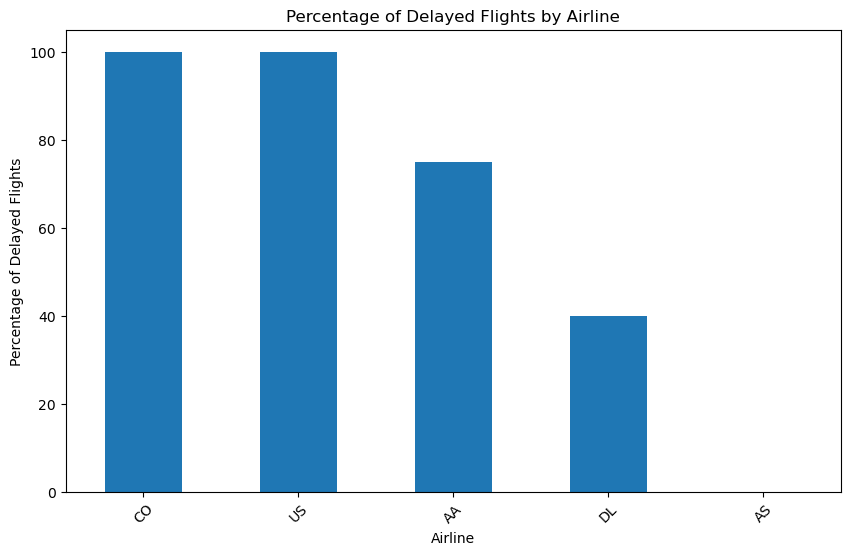

In [90]:
# Calculate the percentage of delayed flights for each airline
delayed_flights_percentage = merged_df.groupby('Airline')['Delay'].mean() * 100

# Sort the airlines based on the percentage of delayed flights
delayed_flights_percentage = delayed_flights_percentage.sort_values(ascending=False)

# Plotting the delayed flights percentage
plt.figure(figsize=(10, 6))
delayed_flights_percentage.plot(kind='bar')
plt.title('Percentage of Delayed Flights by Airline')
plt.xlabel('Airline')
plt.ylabel('Percentage of Delayed Flights')
plt.xticks(rotation=45)
plt.show()


b. Finding the safest day of the week for travel based on the number of delayed flights:

In [91]:
# Counting the number of delayed flights for each day of the week
delayed_flights_by_weekday = merged_df.groupby('DayOfWeek')['Delay'].sum()

# Sorting the weekdays based on the number of delayed flights
safest_day = delayed_flights_by_weekday.idxmin()

print("The safest day for travel based on the lowest number of delayed flights is:", safest_day)


The safest day for travel based on the lowest number of delayed flights is: 3


c. Recommending airlines for short-, medium-, and long-distance travel based on flight length:

In [92]:
# Define flight length categories
short_distance = 2000
medium_distance = 4000

# Create a new column to categorize the flight length
merged_df['FlightDistance'] = pd.cut(merged_df['Length'], bins=[0, short_distance, medium_distance, float('inf')], 
                                     labels=['Short', 'Medium', 'Long'])

# Count the number of flights in each distance category for each airline
flight_counts_by_distance = merged_df.groupby(['Airline', 'FlightDistance']).size().unstack()

# Get the airline with the maximum number of flights in each distance category
recommended_airlines = {
    'Short-Distance': flight_counts_by_distance['Short'].idxmax(),
    'Medium-Distance': flight_counts_by_distance['Medium'].idxmax(),
    'Long-Distance': flight_counts_by_distance['Long'].idxmax()
}

print("Recommended airlines for:")
for distance, airline in recommended_airlines.items():
    print(distance + " travel:", airline)


Recommended airlines for:
Short-Distance travel: DL
Medium-Distance travel: AA
Long-Distance travel: AA


d. Finding patterns in departure times of long-duration flights:

In [93]:
# As I Couldnt find any patterns in a depature times for a long duration.
# But I checked for the shorter duration in which I was able to find the patterns in a departure time

In [94]:
airlines["Length"].unique()

array([205, 222, 165, 195, 202, 181, 220, 228, 216, 200, 201, 212, 210,
       170, 215, 179, 213, 162, 167, 206, 270, 380, 327, 169, 180,  36,
        85,  53, 111, 135,  41,  44,  68,  49,  75,  93,  95, 166,  97,
        96,  58, 158,  62,  64,  70,  69,  83,  87,  50, 120, 233,  72,
        80,  84, 142,  65,  67, 147, 132,  57, 114, 102, 148,  35, 159,
       112,  46,  76, 128, 185, 231, 164,  74, 174, 110,  59, 144, 109,
       118, 134,  47, 100,  66,  71, 183, 119, 190, 160, 140, 219, 208,
        55,  54, 235, 127, 131, 113, 123, 133,  45, 107,  34,  32,  81,
       130, 129, 115,  60, 175, 105,  61,  38,  90, 137, 101, 103,  48,
       125,  82, 225, 260, 245, 150, 280, 240, 315, 143, 168, 156, 192,
        77, 141, 218, 138, 238, 326, 223, 253,  98, 151,  86,  88, 116,
       157,  79, 155, 121,  40, 146, 136,  78, 139,  73,  89, 171, 342,
       404,  94, 108, 152, 172, 145, 117, 184, 249, 188,  63, 237,  33,
       161,  52, 250,  42, 204, 163, 178, 104, 124, 211, 265, 23

In [95]:
# Define the threshold for short duration
short_distance = 1000  # Example threshold value in feet

# Filter short-duration flights (excluding 0 values)
short_duration_flights = airlines[(airlines['Length'] < short_distance) & (airlines['Length'] > 0)]

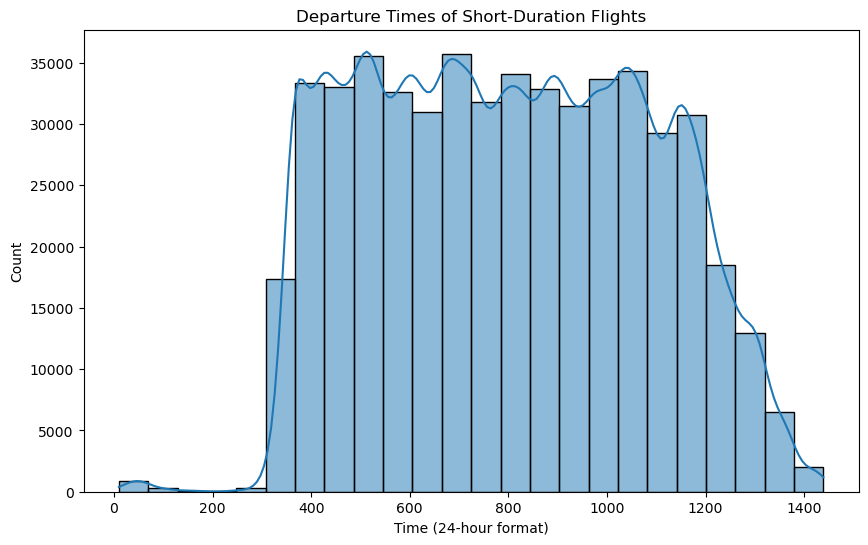

In [96]:
# Plotting the departure times of short-duration flights
plt.figure(figsize=(10, 6))
sns.histplot(data=short_duration_flights, x='Time', bins=24, kde=True)
plt.title('Departure Times of Short-Duration Flights')
plt.xlabel('Time (24-hour format)')
plt.ylabel('Count')
plt.show()

4. How many flights were delayed at large hubs compared to medium hubs? Use 
appropriate visualization to represent your findings.

In [97]:
delayed_flights = merged_df[merged_df['Delay'] > 0]
hub_counts = delayed_flights['Airports (large hubs)'].value_counts()

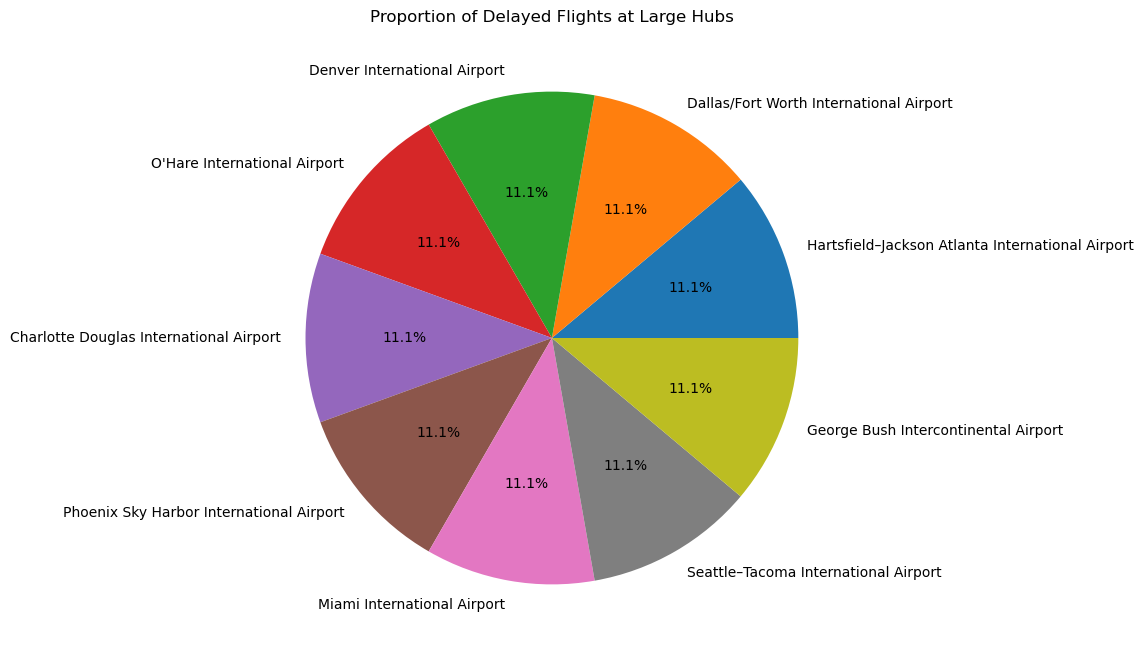

In [98]:
# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(hub_counts, labels=hub_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Delayed Flights at Large Hubs')
plt.show()

In [99]:
delayed_flights = merged_df[merged_df['Delay'] > 0]
hub_counts = delayed_flights['Airports (medium hubs)'].value_counts()

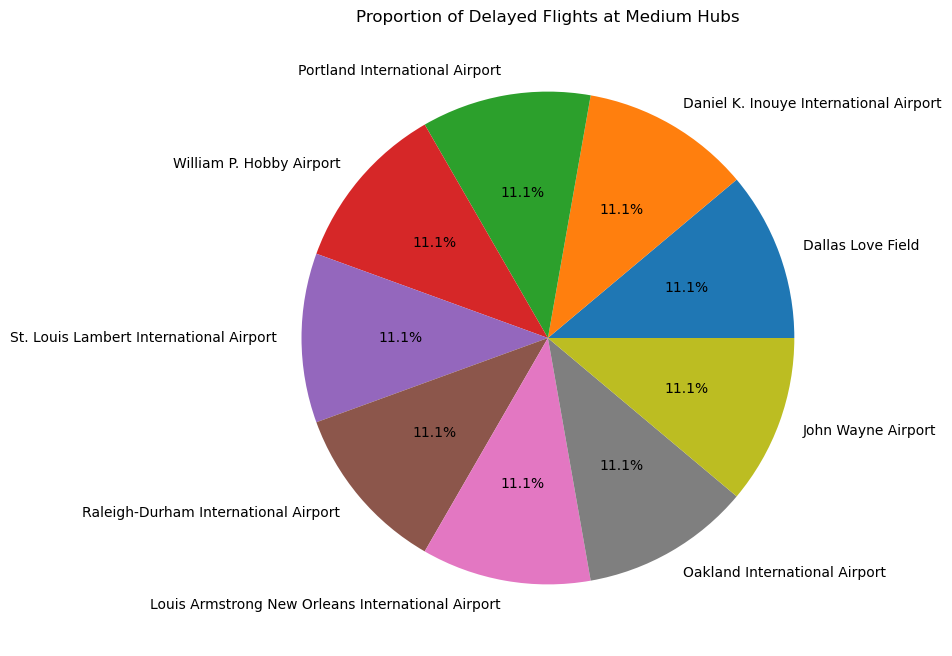

In [100]:
# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(hub_counts, labels=hub_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Delayed Flights at Medium Hubs')
plt.show()

5. Use hypothesis testing strategies to discover:

a. If the airport's altitude has anything to do with flight delays for incoming and departing flights:

Null Hypothesis (H0): The airport's altitude has no effect on flight delays.
Alternative Hypothesis (H1): The airport's altitude has an effect on flight delays.

To test this hypothesis, we can use a statistical test such as the t-test or ANOVA to compare the mean flight delay times between airports at different altitudes.

In [101]:
import scipy.stats as stats

#Altitude can be also determine as elevation_ft
# Separate the data for different altitude groups (e.g., low, medium, high altitude airports)
low_altitude_flights = airline_df[airline_df['elevation_ft'] < 1000]
medium_altitude_flights = airline_df[(airline_df['elevation_ft'] >= 1000) & (merged_df['elevation_ft'] < 2000)]
high_altitude_flights = airline_df[airline_df['elevation_ft'] >= 2000]

# Perform t-test or ANOVA to compare flight delays between altitude groups
_, p_value = stats.ttest_ind(low_altitude_flights['Delay'], high_altitude_flights['Delay'])
# or
_, p_value = stats.f_oneway(low_altitude_flights['Delay'], medium_altitude_flights['Delay'], high_altitude_flights['Delay'])

# Check the significance level (e.g., alpha = 0.05)
if p_value < 0.05:
    print("Reject null hypothesis: The airport's altitude has an effect on flight delays.")
else:
    print("Fail to reject null hypothesis: The airport's altitude has no effect on flight delays.")


Reject null hypothesis: The airport's altitude has an effect on flight delays.


b. If the number of runways at an airport affects flight delays:

Null Hypothesis (H0): The number of runways at an airport has no effect on flight delays.
Alternative Hypothesis (H1): The number of runways at an airport has an effect on flight delays.

To test this hypothesis, we can use a statistical test such as the t-test or ANOVA to compare the mean flight delay times between airports with different numbers of runways.

In [102]:
import scipy.stats as stats

# Calculate runway counts
runway_count = airline_df['ident'].value_counts()

# Separate the data for different runway groups (e.g., airports with 1 runway, 2 runways, etc.)
runway1_identifiers = runway_count[runway_count == 1].index
runway2_identifiers = runway_count[runway_count == 2].index

# Filter the dataframe based on runway groups
runway1_flights = airline_df[airline_df['ident'].isin(runway1_identifiers)]
runway2_flights = airline_df[airline_df['ident'].isin(runway2_identifiers)]
# Add more groups as per the available data

# Perform t-test or ANOVA to compare flight delays between runway groups
_, p_value = stats.ttest_ind(runway1_flights['Delay'], runway2_flights['Delay'])
# or
_, p_value = stats.f_oneway(runway1_flights['Delay'], runway2_flights['Delay'])
# Add more groups as per the available data

# Check the significance level (e.g., alpha = 0.05)
if p_value < 0.05:
    print("Reject null hypothesis: The number of runways at an airport has an effect on flight delays.")
else:
    print("Fail to reject null hypothesis: The number of runways at an airport has no effect on flight delays.")


Fail to reject null hypothesis: The number of runways at an airport has no effect on flight delays.


c. If the duration of a flight (length) affects flight delays

Null Hypothesis (H0): The duration of a flight has no effect on flight delays.
Alternative Hypothesis (H1): The duration of a flight has an effect on flight delays.

To test this hypothesis, we can perform a correlation analysis between the flight duration and flight delay. If there is a significant correlation, it suggests that the flight duration might have an effect on flight delays.

In [103]:
import scipy.stats as stats

# Calculate the correlation coefficient and p-value between flight duration and flight delay
correlation_coef, p_value = stats.pearsonr(merged_df['Length'], merged_df['Delay'])

# Check the significance level (e.g., alpha = 0.05)
if p_value < 0.05:
    print("Reject null hypothesis: The duration of a flight has an effect on flight delays.")
else:
    print("Fail to reject null hypothesis: The duration of a flight has no effect on flight delays.")


Fail to reject null hypothesis: The duration of a flight has no effect on flight delays.


f the result of the hypothesis test is "Fail to reject the null hypothesis," it suggests that there is not enough evidence to conclude that the duration of a flight has an effect on flight delays. In other words, based on the data and analysis conducted, there is no significant relationship between the flight duration and flight delays.

This means that the length of a flight alone may not be a strong predictor or factor contributing to flight delays. Other variables or factors such as weather conditions, airport congestion, air traffic control, or specific airline operations could have a more significant impact on flight delays.

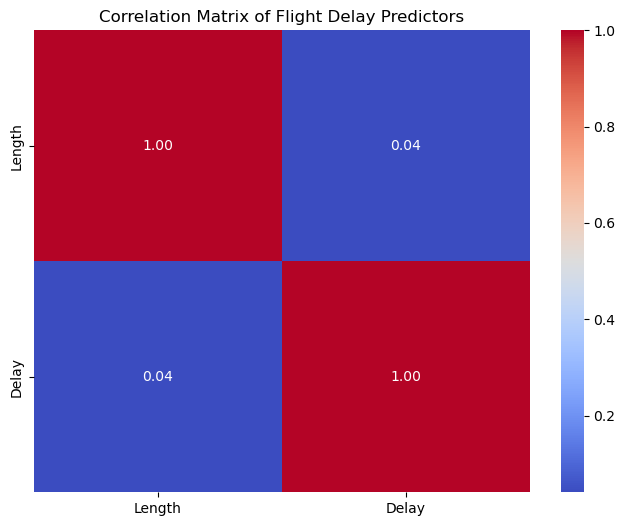

In [104]:
# Assuming 'airlines' is your DataFrame containing the 'Length' and 'Delay' columns

# Subset the DataFrame with the selected predictors
predictors_df = airlines[['Length', 'Delay']]

# Calculate the correlation matrix
correlation_matrix = predictors_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Flight Delay Predictors')
plt.show()


That is the correlation matrix between the 'Length' and 'Delay' columns in the 'airlines' DataFrame. The correlation coefficient between 'Length' and 'Delay' is approximately 0.0406, indicating a very weak positive correlation.

# Machine learning (Task 1)


1. Use OneHotEncoder and OrdinalEncoder to deal with categorical variables

In [105]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42387 entries, 0 to 42386
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ident          42387 non-null  object 
 1   type           42387 non-null  object 
 2   name           42387 non-null  object 
 3   latitude_deg   42387 non-null  float64
 4   longitude_deg  42387 non-null  float64
 5   iso_country    42387 non-null  object 
 6   length_ft      42387 non-null  float64
 7   width_ft       42387 non-null  float64
 8   surface        42387 non-null  object 
 9   elevation_ft   42387 non-null  float64
 10  No of Runways  42387 non-null  int64  
 11  id             42387 non-null  int64  
 12  Airline        42387 non-null  object 
 13  Flight         42387 non-null  int64  
 14  AirportFrom    42387 non-null  object 
 15  AirportTo      42387 non-null  object 
 16  DayOfWeek      42387 non-null  int64  
 17  Time           42387 non-null  int64  
 18  Length

In [106]:
airline_df.tail()

,ident,type,name,latitude_deg,longitude_deg,iso_country,length_ft,width_ft,surface,elevation_ft,No of Runways,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
42382,ZYTN,medium_airport,Tonghua Sanyuanpu Airport,42.253889,125.703333,CN,7546.0,75.0,ASP,1200.000000,1,43972,DL,2086,ATL,LGA,5,760,139,1
42383,ZYTX,large_airport,Shenyang Taoxian International Airport,41.639801,123.483002,CN,10499.0,148.0,CON,198.000000,1,43973,DL,629,DCA,DTW,5,760,95,0
42384,ZYYJ,medium_airport,Yanji Chaoyangchuan Airport,42.882801,129.451004,CN,8530.0,148.0,CON,624.000000,1,43974,EV,5510,ATL,MOB,5,760,78,0
42385,ZYYK,medium_airport,Yingkou Lanqi Airport,40.542524,122.358600,CN,8202.0,75.0,ASP,1156.817202,1,43975,EV,7125,IAD,BUF,5,760,69,0
42386,ZZ-0003,small_airport,Fainting Goat Airport,32.110587,-97.356312,US,1800.0,15.0,Turf,690.000000,1,43976,F9,795,DEN,PDX,5,760,164,0


In [107]:
airline_df.isnull().sum()

ident            0
type             0
name             0
latitude_deg     0
longitude_deg    0
iso_country      0
length_ft        0
width_ft         0
surface          0
elevation_ft     0
No of Runways    0
id               0
Airline          0
Flight           0
AirportFrom      0
AirportTo        0
DayOfWeek        0
Time             0
Length           0
Delay            0
dtype: int64

In [108]:
# Filter columns with object data type
object_columns = airline_df.select_dtypes(include='object')

# Get the column names
object_column_names = object_columns.columns.tolist()

# Display the column names
print(object_column_names)

['ident', 'type', 'name', 'iso_country', 'surface', 'Airline', 'AirportFrom', 'AirportTo']


In [109]:
airline_df.shape

(42387, 20)

In [110]:
unique_values = {}
for column in airline_df.columns:
    unique_values[column] = airline_df[column].unique()

for column, values in unique_values.items():
    print(f"Unique values in column '{column}':")
    print(values)
    print()


Unique values in column 'ident':
['00A' '00AK' '00AL' ... 'ZYYJ' 'ZYYK' 'ZZ-0003']

Unique values in column 'type':
['heliport' 'small_airport' 'closed' 'seaplane_base' 'balloonport'
 'medium_airport' 'large_airport']

Unique values in column 'name':
['Total Rf Heliport' 'Lowell Field' 'Epps Airpark' ...
 'Yanji Chaoyangchuan Airport' 'Yingkou Lanqi Airport'
 'Fainting Goat Airport']

Unique values in column 'latitude_deg':
[40.07080078 59.947733   34.8647995  ... 42.88280106 40.542524
 32.110587  ]

Unique values in column 'longitude_deg':
[ -74.93360138 -151.692524    -86.77030182 ...  129.45100403  122.3586
  -97.356312  ]

Unique values in column 'iso_country':
['US' 'PR' 'MH' 'GU' 'PG' 'SB' 'CN' 'AL' 'AM' 'MX' 'PW' 'NR' 'AQ' 'AR'
 'AT' 'AU' 'ID' 'AZ' 'BA' 'BE' 'BG' 'GL' 'BH' 'IS' 'XK' 'BR' 'TH' 'BW'
 'BY' 'BZ' 'CA' 'GB' 'CD' 'CH' 'CL' 'CO' 'CY' 'CZ' 'DZ' 'BJ' 'DE' 'BF'
 'GH' 'CI' 'DJ' 'DK' 'NG' 'NE' 'TN' 'TG' 'EC' 'EE' 'EG' 'FI' 'GG' 'JE'
 'IM' 'FK' 'NL' 'IE' 'FO' 'LU' 'NO' 'PL' '

In [111]:
airlineUsa = airline_df.copy()


In [112]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
airlineUsa['AirportFrom'] = label_encoder.fit_transform(airlineUsa['AirportFrom'])
airlineUsa['AirportTo'] = label_encoder.transform(airlineUsa['AirportTo'])

In [113]:
airlineUsa.head()

,ident,type,name,latitude_deg,longitude_deg,iso_country,length_ft,width_ft,surface,elevation_ft,No of Runways,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,00A,heliport,Total Rf Heliport,40.070801,-74.933601,US,80.0,80.0,ASPH-G,11.0,1,1,CO,269,248,131,3,15,205,1
1,00AK,small_airport,Lowell Field,59.947733,-151.692524,US,2500.0,70.0,GRVL,450.0,1,2,US,1558,212,57,3,15,222,1
2,00AL,small_airport,Epps Airpark,34.864799,-86.770302,US,2300.0,200.0,TURF,820.0,1,3,AA,2400,150,77,3,20,165,1
3,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,US,40.0,40.0,GRASS,237.0,1,4,AA,2466,248,77,3,20,195,1
4,00AS,small_airport,Fulton Airport,34.942803,-97.818019,US,1450.0,60.0,Turf,1100.0,1,5,AS,108,12,247,3,30,202,0


In [114]:
airlineUsa.drop('id', axis=1, inplace=True)

In [115]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [116]:
import category_encoders as ce

# Create an instance of CountEncoder
frequency_encoder = ce.CountEncoder()

# Perform frequency encoding on the 'Airline' column
airlineUsa['Airline_encoded'] = frequency_encoder.fit_transform(airlineUsa['Airline'])

# Print the encoded dataframe
print(airlineUsa)


         ident            type                                    name  \
0          00A        heliport                       Total Rf Heliport   
1         00AK   small_airport                            Lowell Field   
2         00AL   small_airport                            Epps Airpark   
3         00AR          closed      Newport Hospital & Clinic Heliport   
4         00AS   small_airport                          Fulton Airport   
...        ...             ...                                     ...   
42382     ZYTN  medium_airport               Tonghua Sanyuanpu Airport   
42383     ZYTX   large_airport  Shenyang Taoxian International Airport   
42384     ZYYJ  medium_airport             Yanji Chaoyangchuan Airport   
42385     ZYYK  medium_airport                   Yingkou Lanqi Airport   
42386  ZZ-0003   small_airport                   Fainting Goat Airport   

       latitude_deg  longitude_deg iso_country  length_ft  width_ft surface  \
0         40.070801     -74.9336

In [117]:
# Drop a column
airlineUsa.drop('Airline', axis=1, inplace=True)

# Rename a column
airlineUsa.rename(columns={'Airline_encoded': 'Airline'}, inplace=True)

In [118]:
# Create an instance of TargetEncoder
target_encoder = ce.TargetEncoder()

# Perform target encoding on the 'iso_country' column
airlineUsa['iso_country'] = target_encoder.fit_transform(airlineUsa['iso_country'], airlineUsa['Delay'])

# Print the updated DataFrame
print(airlineUsa)

         ident            type                                    name  \
0          00A        heliport                       Total Rf Heliport   
1         00AK   small_airport                            Lowell Field   
2         00AL   small_airport                            Epps Airpark   
3         00AR          closed      Newport Hospital & Clinic Heliport   
4         00AS   small_airport                          Fulton Airport   
...        ...             ...                                     ...   
42382     ZYTN  medium_airport               Tonghua Sanyuanpu Airport   
42383     ZYTX   large_airport  Shenyang Taoxian International Airport   
42384     ZYYJ  medium_airport             Yanji Chaoyangchuan Airport   
42385     ZYYK  medium_airport                   Yingkou Lanqi Airport   
42386  ZZ-0003   small_airport                   Fainting Goat Airport   

       latitude_deg  longitude_deg  iso_country  length_ft  width_ft surface  \
0         40.070801     -74.933

In [119]:
# Calculate the frequency of each unique surface value
frequency_data = airlineUsa['surface'].value_counts().reset_index()
frequency_data.columns = ['surface', 'frequency']

# Merge the frequency data back to the original DataFrame
airlineUsa = airlineUsa.merge(frequency_data, on='surface', how='left')

# Replace the 'surface' column values with the frequency values
airlineUsa['surface'] = airlineUsa['frequency']

In [120]:
airlineUsa.head()

,ident,type,name,latitude_deg,longitude_deg,iso_country,length_ft,width_ft,surface,elevation_ft,No of Runways,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Airline,frequency
0,00A,heliport,Total Rf Heliport,40.070801,-74.933601,0.362333,80.0,80.0,610,11.0,1,269,248,131,3,15,205,1,1629,610
1,00AK,small_airport,Lowell Field,59.947733,-151.692524,0.362333,2500.0,70.0,311,450.0,1,1558,212,57,3,15,222,1,2890,311
2,00AL,small_airport,Epps Airpark,34.864799,-86.770302,0.362333,2300.0,200.0,7222,820.0,1,2400,150,77,3,20,165,1,3687,7222
3,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,0.362333,40.0,40.0,209,237.0,1,2466,248,77,3,20,195,1,3687,209
4,00AS,small_airport,Fulton Airport,34.942803,-97.818019,0.362333,1450.0,60.0,734,1100.0,1,108,12,247,3,30,202,0,935,734


In [121]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder to the 'type' column and transform the values
airlineUsa['type'] = label_encoder.fit_transform(airlineUsa['type'])

In [122]:
airlineUsa.head()

,ident,type,name,latitude_deg,longitude_deg,iso_country,length_ft,width_ft,surface,elevation_ft,No of Runways,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Airline,frequency
0,00A,2,Total Rf Heliport,40.070801,-74.933601,0.362333,80.0,80.0,610,11.0,1,269,248,131,3,15,205,1,1629,610
1,00AK,6,Lowell Field,59.947733,-151.692524,0.362333,2500.0,70.0,311,450.0,1,1558,212,57,3,15,222,1,2890,311
2,00AL,6,Epps Airpark,34.864799,-86.770302,0.362333,2300.0,200.0,7222,820.0,1,2400,150,77,3,20,165,1,3687,7222
3,00AR,1,Newport Hospital & Clinic Heliport,35.608700,-91.254898,0.362333,40.0,40.0,209,237.0,1,2466,248,77,3,20,195,1,3687,209
4,00AS,6,Fulton Airport,34.942803,-97.818019,0.362333,1450.0,60.0,734,1100.0,1,108,12,247,3,30,202,0,935,734


In [123]:
columns_to_drop = ['ident', 'name', 'frequency']
airlineUsa = airlineUsa.drop(columns_to_drop, axis=1)

In [124]:
airlineUsa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42387 entries, 0 to 42386
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           42387 non-null  int32  
 1   latitude_deg   42387 non-null  float64
 2   longitude_deg  42387 non-null  float64
 3   iso_country    42387 non-null  float64
 4   length_ft      42387 non-null  float64
 5   width_ft       42387 non-null  float64
 6   surface        42387 non-null  int64  
 7   elevation_ft   42387 non-null  float64
 8   No of Runways  42387 non-null  int64  
 9   Flight         42387 non-null  int64  
 10  AirportFrom    42387 non-null  int32  
 11  AirportTo      42387 non-null  int32  
 12  DayOfWeek      42387 non-null  int64  
 13  Time           42387 non-null  int64  
 14  Length         42387 non-null  int64  
 15  Delay          42387 non-null  int64  
 16  Airline        42387 non-null  int64  
dtypes: float64(6), int32(3), int64(8)
memory usage: 5.

In [125]:
airlineUsa.describe()

,type,latitude_deg,longitude_deg,iso_country,length_ft,width_ft,surface,elevation_ft,No of Runways,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Airline
count,42387.000000,42387.000000,42387.000000,42387.000000,42387.000000,42387.000000,42387.000000,42387.000000,42387.000000,42387.000000,42387.000000,42387.000000,42387.000000,42387.000000,42387.000000,42387.000000,42387.000000
mean,4.654446,26.094442,-51.006571,0.360906,3247.463042,106.642414,4833.773350,1156.817202,1.403709,2501.520608,141.002194,140.434827,3.788213,755.000684,130.413523,0.360795,3834.471536
std,1.797567,26.962224,74.478112,0.065490,2690.596105,216.540366,4421.578367,1422.281214,0.828379,2084.233555,78.131577,77.842390,0.738456,275.095874,69.557780,0.480237,2224.113927
min,0.000000,-90.000000,-179.876999,0.122404,0.000000,0.000000,1.000000,-1266.000000,1.000000,1.000000,0.000000,0.000000,3.000000,10.000000,24.000000,0.000000,430.000000
25%,4.000000,20.766761,-95.692519,0.349112,1640.000000,60.000000,574.000000,230.000000,1.000000,767.000000,76.000000,76.000000,3.000000,520.000000,80.000000,0.000000,2299.000000
50%,6.000000,36.674900,-80.616203,0.362333,2713.000000,75.000000,2971.000000,751.000000,1.000000,1885.000000,149.000000,149.000000,4.000000,715.000000,113.000000,0.000000,3045.000000
75%,6.000000,42.854486,-43.911333,0.362333,4200.000000,100.000000,11137.000000,1341.000000,2.000000,3854.000000,203.000000,203.000000,4.000000,985.000000,160.000000,1.000000,5120.000000
max,6.000000,82.517799,179.340587,0.576388,30000.000000,9000.000000,11137.000000,14472.000000,11.000000,7812.000000,285.000000,285.000000,5.000000,1439.000000,655.000000,1.000000,7795.000000


2. Perform the following model building steps:

a. Apply logistic regression (use stochastic gradient descent optimizer) and decision tree 
models

b. Use the stratified five-fold method to build and validate the models
Note: Make sure you use standardization effectively, ensuring no data leakage and 
leverage pipelines to have a cleaner code

In [126]:
#Checking out with the various feature sekection techniques 
from sklearn.feature_selection import SelectKBest, f_classif

# Select top K features using ANOVA F-value
k = 12
selector = SelectKBest(score_func=f_classif, k=k)

# Define the features and target variable
features = airlineUsa[['type', 'latitude_deg', 'longitude_deg', 'iso_country', 'length_ft', 'width_ft', 'surface', 'elevation_ft', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time', 'Length', 'Airline']]
target_variable = airlineUsa['Delay']  

# Fit the selector on the data
selector.fit(features, target_variable)

# Get the selected features
selected_features = features.columns[selector.get_support()]

# Print the selected features
print(selected_features)

Index(['type', 'latitude_deg', 'longitude_deg', 'iso_country', 'length_ft',
       'surface', 'Flight', 'AirportTo', 'DayOfWeek', 'Time', 'Length',
       'Airline'],
      dtype='object')


2. Perform the following model building steps:

a. Apply logistic regression (use stochastic gradient descent optimizer) and decision tree 
models

b. Use the stratified five-fold method to build and validate the models
Note: Make sure you use standardization effectively, ensuring no data leakage and 
leverage pipelines to have a cleaner code

c. Use RandomizedSearchCV for hyperparameter tuning, and use k-fold for crossvalidation

d. Keep a few data points (10%) for prediction purposes to evaluate how you would 
make the final prediction, and do not use this data for testing or validation

Note: The final prediction will be based on the voting (majority class by 5 models created 
using the stratified 5-fold method)

g. Compare the results of logistic regression and decision tree classifier

3. Use the stratified five-fold method to build and validate the models using the XGB 
classifier, compare all methods, and share your findings

In [127]:
!pip install xgboost

In [128]:
#Importing the appropriate libraries

from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

In [129]:
# Step 2: Separate the features (X) and the target variable (y)
X = airlineUsa.drop('Delay', axis=1)
y = airlineUsa['Delay']

In [130]:
# Step 3: Create a stratified five-fold cross-validation object
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [131]:
# Step 4: Initialize lists to store the cross-validation scores for each model
logistic_scores = []
tree_scores = []
xgb_scores = []

In [132]:
# Step 5: Iterate over the folds and train/validate the models
for train_index, val_index in stratified_kfold.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

In [133]:
 # Step 6: Create pipelines for logistic regression, decision tree, and XGBoost with SMOTE and standard scaler
from sklearn.linear_model import SGDClassifier
logistic_pipeline = make_pipeline(
    StandardScaler(),
    SMOTE(),
    SGDClassifier(loss='log', max_iter=1000)
)

tree_pipeline = make_pipeline(
    StandardScaler(),
    SMOTE(),
    DecisionTreeClassifier()
)

xgb_pipeline = make_pipeline(
    StandardScaler(),
    SMOTE(),
    XGBClassifier()
 )

In [134]:
# Step 7: Train and evaluate logistic regression
logistic_pipeline.fit(X_train, y_train)
logistic_score = logistic_pipeline.score(X_val, y_val)
logistic_scores.append(logistic_score)

C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [135]:
# Step 8: Train and evaluate decision tree classifier
tree_pipeline.fit(X_train, y_train)
tree_score = tree_pipeline.score(X_val, y_val)
tree_scores.append(tree_score)

In [136]:
# Step 9: Train and evaluate XGBoost classifier
xgb_pipeline.fit(X_train, y_train)
xgb_score = xgb_pipeline.score(X_val, y_val)
xgb_scores.append(xgb_score)

In [137]:
# Step 10: Calculate the average cross-validation scores for each model
avg_logistic_score = np.mean(logistic_scores)
avg_tree_score = np.mean(tree_scores)
avg_xgb_score = np.mean(xgb_scores)

In [138]:
# Step 11: Compare the results of logistic regression and decision tree classifier
print("Logistic Regression Average Score:", avg_logistic_score)
print("Decision Tree Average Score:", avg_tree_score)

Logistic Regression Average Score: 0.6332428925327357
Decision Tree Average Score: 0.6092957414179545


In [139]:
# Step 12: Use the stratified five-fold method to build and validate the models using the XGBoost classifier
print("XGBoost Average Score:", avg_xgb_score)

XGBoost Average Score: 0.6938775510204082


In [140]:
# Step 13: Combine the models using VotingClassifier
voting_classifier = VotingClassifier(
    estimators=[
        ('logistic', logistic_pipeline),
        ('tree', tree_pipeline),
        ('xgb', xgb_pipeline)
    ],
    voting='hard'
)


In [141]:
# Step 14: Fit the voting classifier on Voting
voting_classifier.fit(X, y)

C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


VotingClassifier(estimators=[('logistic',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('smote', SMOTE()),
                                              ('sgdclassifier',
                                               SGDClassifier(loss='log'))])),
                             ('tree',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('smote', SMOTE()),
                                              ('decisiontreeclassifier',
                                               DecisionTreeClassifier())])),
                             ('xgb',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),...
                                                             grow_policy=None,
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=None,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             n_estimators=100,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             predictor=None,
                                                             random_state=None, ...))]))])

In [142]:
#Step 15: Split the dataset, reserving 10% for final prediction evaluation
X_train, X_final, y_train, y_final = train_test_split(X, y, test_size=0.1, random_state=42)

In [143]:
#Step 16: Make the final prediction using the voting classifier
final_pred = voting_classifier.predict(X_final)

In [144]:
#Step 17: Calculate the accuracy of the final prediction
final_accuracy = accuracy_score(y_final, final_pred)

In [145]:
#Step 18: Print the final prediction evaluation
print("Final Prediction Evaluation:")
print(final_pred)

Final Prediction Evaluation:
[1 0 1 ... 0 0 1]


In [146]:
#Step 19: Print the accuracy of the final prediction
print("Final Prediction Accuracy:", final_accuracy)

Final Prediction Accuracy: 0.8532672800188724


In [147]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Step 20: Calculate precision, recall, and F1-score for the final prediction
precision = precision_score(y_final, final_pred)
recall = recall_score(y_final, final_pred)
f1 = f1_score(y_final, final_pred)

# Step 21: Print precision, recall, and F1-score
print("Final Prediction Evaluation:")
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Final Prediction Evaluation:
Precision: 0.8153735632183908
Recall: 0.7566666666666667
F1-score: 0.784923928077455


In [148]:
!pip install nbconvert